In [1]:
import numpy as np
import librosa
from librosa.display import specshow
import matplotlib.pyplot as plt
from IPython.display import Audio
   
def plot_spec(spec):
    plt.figure(figsize=(10, 4))
    specshow(spec, x_axis='time', y_axis='mel', sr=16000, fmax=8000)
    plt.colorbar(format='%+2.0f')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.show()


def to_numpy(t):
    return t.view(256,128).detach().numpy()

In [2]:
CHECKPOINT = 'spectral-u-net-spec-mel-no-mask-1576563888.full.ckpt'
# CHECKPOINT = 'spectral-u-net-mel-spectrogram-1576563030.full.ckpt'
# CHECKPOINT = 'spectral-u-net-mel-spectrogram-norm-input-1576563634.full.ckpt'

In [3]:
branch_suffix = '-'.join(CHECKPOINT.replace('spectral-u-net-', '').split('-')[0:-1])
branch = f'train/{branch_suffix}'
print(branch)

train/spec-mel-no-mask


In [4]:
%%bash -s $branch
cd ../../speech-enhancement
git checkout $1

Your branch is up to date with 'origin/train/spec-mel-no-mask'.


Switched to branch 'train/spec-mel-no-mask'


In [5]:
from src.datasets import NoisySpectralSpeechDataset
from src.utils import checkpoint, spectral, notebook

In [6]:
dataset = NoisySpectralSpeechDataset(train=False, quiet=True)

In [7]:
net = checkpoint.load(CHECKPOINT, use_cuda=False)
net = net.eval()

In [8]:
IDX = 120

noisy_arr, clean_arr = dataset.noisy_data[IDX], dataset.clean_data[IDX]
noisy_spec, clean_spec = dataset[IDX]

In [9]:
pred_clean_spec = net(noisy_spec.view(1, 1, 256, 128))

In [24]:
ideal_mask = noisy_spec - clean_spec

In [25]:
clean_spec, clean_spec.min(), clean_spec.max()

(tensor([[[ -1.2586,  -1.3991,  -3.3476,  ...,  -1.8972,  -1.9735,  -2.7969],
          [ -1.9602,  -1.8201,  -3.4212,  ...,  -2.3295,  -2.1523,  -3.3333],
          [ -8.3843,  -2.5458,  -3.4819,  ...,  -3.0924,  -2.3737,  -4.5241],
          ...,
          [-14.9349, -16.2852, -19.3121,  ..., -19.1964, -19.1796, -19.7187],
          [-15.4229, -16.8100, -22.5147,  ..., -22.3475, -22.2768, -20.6498],
          [-15.5114, -16.8966, -23.0165,  ..., -23.0248, -23.0201, -20.5801]]]),
 tensor(-23.0248),
 tensor(5.1069))

In [26]:
noisy_spec, noisy_spec.min(), noisy_spec.max()

(tensor([[[  1.3744,   1.6035,   2.5618,  ...,   0.3406,   2.1931,   0.8513],
          [  1.0867,   0.9263,   1.9904,  ...,   1.4654,   2.1708,   0.5680],
          [  0.6810,  -2.0096,   0.5744,  ...,   1.9699,   2.1422,   0.1785],
          ...,
          [ -9.6528,  -9.9171, -10.4582,  ...,  -9.7302,  -9.7382,  -9.8528],
          [-11.0300, -12.2332, -14.2696,  ..., -13.8568, -13.4497, -11.0970],
          [-11.8188, -13.2016, -19.1747,  ..., -18.6957, -17.9293, -11.8933]]]),
 tensor(-21.1038),
 tensor(5.1558))

In [27]:
ideal_mask, ideal_mask.min(), ideal_mask.max()

(tensor([[[2.6329, 3.0026, 5.9094,  ..., 2.2378, 4.1666, 3.6481],
          [3.0469, 2.7463, 5.4116,  ..., 3.7949, 4.3231, 3.9012],
          [9.0653, 0.5362, 4.0564,  ..., 5.0623, 4.5159, 4.7026],
          ...,
          [5.2821, 6.3681, 8.8539,  ..., 9.4662, 9.4414, 9.8659],
          [4.3929, 4.5769, 8.2451,  ..., 8.4907, 8.8271, 9.5527],
          [3.6926, 3.6950, 3.8418,  ..., 4.3291, 5.0908, 8.6868]]]),
 tensor(-8.5634),
 tensor(19.0161))

In [14]:
import matplotlib.pyplot as plt

def hist(spec):
    n, bins, patches = plt.hist(spec.flatten(),bins=100)
    plt.ylim(0, 5)
    plt.show()

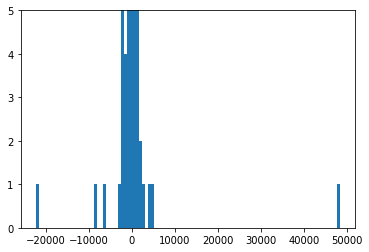

In [15]:
hist(to_numpy(ideal_mask))

In [16]:
ideal_mask.min()

tensor(-22302.0723)

In [17]:
ideal_mask.max()

tensor(48479.0352)

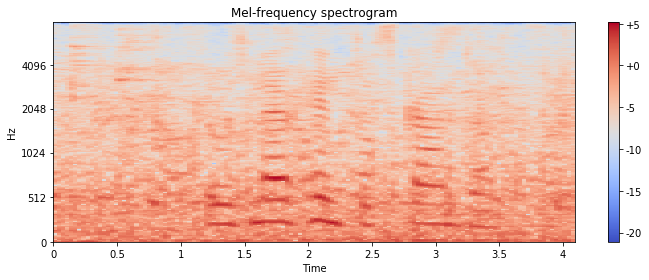

In [18]:
plot_spec(to_numpy(noisy_spec))

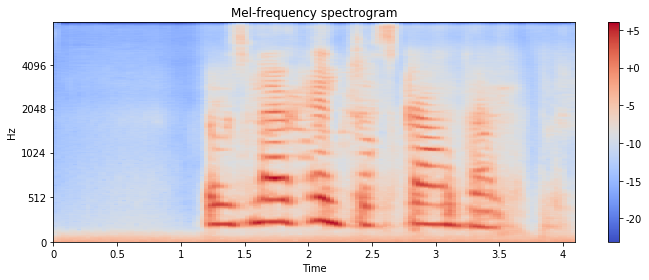

In [19]:
plot_spec(to_numpy(pred_clean_spec))

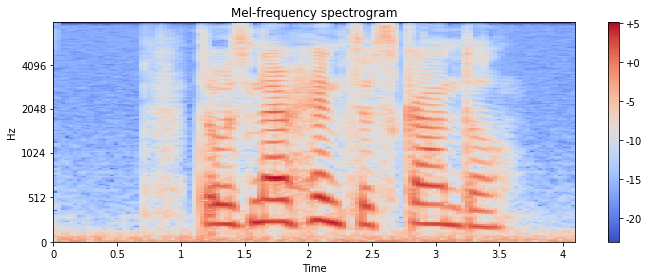

In [20]:
plot_spec(to_numpy(clean_spec))

In [21]:
audio_arr = spectral.log_mel_spec_to_audio(to_numpy(pred_clean_spec))
Audio(audio_arr, rate=16000)

In [22]:
Audio(clean_arr, rate=16000)

In [23]:
Audio(noisy_arr, rate=16000)